# EDA

## Initial step
Import libraries, load and translate dataset.

In [224]:
# Import libraries

# basic libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
# import ast
pd.set_option('display.max_rows', 500) # to show more rows.

# for translation
import sys
sys.path.append('../')
from Translate_data import translate_data

# to plot
import altair as alt
alt.renderers.enable('mimetype')

# root to call the data 
root = "../../../data/"

In [168]:
# Load Data
df = pd.read_csv(root + 'saber_combined_all_fields.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head(3)

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,estu_exterior,periodo,estu_consecutivo,estu_estadocivil,estu_estudiante,estu_pais_reside,...,punt_biologia,punt_quimica,punt_fisica,punt_ciencias_sociales,punt_filosofia,punt_ingles,desemp_ingles,profundiza,puntaje_prof,desemp_prof
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,49.0,NaN
1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Soltero,ESTUDIANTE,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Soltero,ESTUDIANTE,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I


In [169]:
# Translate data
df_eng = translate_data(df, 'spanish', 'english')
df_eng.head(3)

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,...,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Single,STUDENT,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,SCORE_INTERDISC_ENVIRONMENT,49.0,NaN
1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Single,STUDENT,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,SCORE_DEEPEN_LANGUAGE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Single,STUDENT,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,SCORE_DEEPEN_BIOLOGY,5.0,I


In [170]:
# Wrangling Municipality
import re
municipality_list = list(df_eng['cole_municipality_location'].unique()) + \
                    list(df_eng['your_municipality_resides'].unique()) + \
                    list(df_eng['your_inst_municipality'].unique()) + \
                    list(df_eng['your_municipality_resides.1'].unique())

municipality_list = pd.DataFrame(data=municipality_list, columns=['Name'])#.unique()
municipality_list = list(municipality_list.Name.unique())
municipality_list = [str(i) for i in municipality_list]
municipality_list = sorted(municipality_list)
municipality_values = sorted(municipality_list)

municipality_values = [re.sub(r'BOGOTÁ, D.C.', 'BOGOTÁ D.C.', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CARTAGENA$', 'CARTAGENA DE INDIAS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CHIQUINQUIRÁ$', 'CHIQUINQUIRA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CIÉNEGA$', 'CIÉNAGA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'PUERTO ASÍS$', 'PUERTO ASIS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'POPAYÁN$', 'POPAYAN', mun) for mun in municipality_values]
municipality_values = [re.sub(r'FACATATIVÁ$', 'FACATATIVA', mun) for mun in municipality_values]

zip_iterator = zip(municipality_list, municipality_values) # Get pairs of elements
municipality_dict = dict(zip_iterator)  # Convert to dictionary

municipality_columns = ['cole_municipality_location', 'your_municipality_resides',
                        'your_inst_municipality', 'your_municipality_resides.1']

for col in municipality_columns:
    df_eng[col] = df_eng[col].map(municipality_dict)


### Basic Stats

In [171]:
# Columns
print("Columns of `df`:\n\n", list(df_eng.columns))

Columns of `df`:

 ['your_type_of_document', 'your_nationality', 'your_gender', 'your_birthdate', 'your_foreigner', 'period', 'your_consecutive', 'your_marital_status', 'your_student', 'your_country_resides', 'your_have_ethnicity', 'your_dept_resides', 'your_dept_code_resides', 'your_municipality_resides', 'your_municipality_code_resides', 'your_high_school_degree', 'your_year_exam_sb11', 'your_semester_exam__b11', 'your_percentage_credits_approved', 'your_tuition_cost_university', 'your_tuition_pymt_scholarship', 'your_tuition_pymt_credit', 'your_tuition_pymt_parents', 'your_tuition_pymt_yourself', 'your_i_take_course_preparation', 'your_course_teacher_ies', 'your_course_external_support_ies', 'your_course_external_ies', 'your_simulation_type_icfes', 'your_activity_strengths_areas', 'your_activity_strengths_generic', 'your_on_semester', 'fami_current_household_type', 'fami_is_the_head_family', 'fami_econ_dependents', 'fami_father_education', 'fami_mother_education', 'fami_father_occup

In [172]:
# Stats
df_eng.describe()

,period,your_dept_code_resides,your_municipality_code_resides,your_year_exam_sb11,your_on_semester,inst_institution_code,your_prgm_academic_snies,your_prgm_municipality_code,your_inst_municipality_code,score_math_saber_pro,...,cole_dept_code_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_optative_saber_11
count,212010.000000,211645.000000,211645.000000,46960.000000,126187.00000,212010.000000,205479.000000,212010.000000,212010.000000,212010.000000,...,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000
mean,20170.184156,37.972761,29130.862539,2011.922466,6.94940,3476.782727,37047.804530,27598.687312,23531.839177,124.132469,...,31.179492,51.457111,51.778789,49.445092,50.275350,48.835602,49.687142,45.089265,51.896175,29.798788
std,14.162938,947.511332,25780.276662,2.210888,2.68588,3810.251141,39054.944918,25442.052235,23418.009068,67.003673,...,26.212527,7.551992,12.476416,8.194308,8.353876,10.001497,8.703722,9.299312,14.487412,23.229438
min,20123.000000,5.000000,5001.000000,1968.000000,1.00000,1101.000000,1.000000,5001.000000,5001.000000,0.000000,...,5.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,20163.000000,11.000000,11001.000000,2012.000000,4.00000,1704.000000,2524.000000,11001.000000,11001.000000,100.000000,...,11.000000,46.000000,43.000000,44.000000,45.000000,43.000000,44.000000,39.000000,43.000000,5.000000
50%,20173.000000,13.000000,13001.000000,2012.000000,8.00000,1818.000000,13734.000000,11001.000000,11001.000000,145.000000,...,17.000000,52.000000,51.000000,49.000000,50.000000,48.000000,49.000000,45.000000,47.000000,40.000000
75%,20183.000000,52.000000,52001.000000,2012.000000,9.00000,2849.000000,90876.000000,52001.000000,25175.000000,172.000000,...,54.000000,56.000000,58.000000,54.000000,55.000000,55.000000,55.000000,51.000000,58.000000,52.000000
max,20184.000000,99999.000000,99999.000000,2015.000000,11.00000,129593.000000,106552.000000,99001.000000,99001.000000,300.000000,...,99.000000,109.000000,127.000000,100.000000,95.000000,124.000000,111.000000,103.000000,100.000000,90.000000


In [173]:
# Numerical features
num_col=df_eng.select_dtypes(include='number').columns.to_list()
print("Numerical features:", len(num_col), "\n")
print(num_col)

Numerical features: 32 

['period', 'your_dept_code_resides', 'your_municipality_code_resides', 'your_year_exam_sb11', 'your_on_semester', 'inst_institution_code', 'your_prgm_academic_snies', 'your_prgm_municipality_code', 'your_inst_municipality_code', 'score_math_saber_pro', 'score_language_saber_pro', 'score_social_science_saber_pro', 'score_english_saber_pro', 'score_writing_saber_pro', 'your_inst_department_code', 'period.1', 'your_dept_code_resides.1', 'your_municipality_code_resides.1', 'cole_saber_11_icfes_code', 'cole_saber_11_icfes_dane', 'cole_dane_code_campus', 'cole_municipality_code_location', 'cole_dept_code_location', 'score_language_saber_11', 'score_mathematics_saber_11', 'score_biology_saber_11', 'score_chemistry_saber_11', 'score_physics_saber_11', 'score_social_science_saber_11', 'score_philosophy_saber_11', 'score_english_saber_11', 'score_optative_saber_11']


In [174]:
# Categorical features
cat_col = df_eng.select_dtypes(include='object').columns.to_list()
print("Categorical features:", len(cat_col), "\n")
print(cat_col)

Categorical features: 111 

['your_type_of_document', 'your_nationality', 'your_gender', 'your_birthdate', 'your_foreigner', 'your_consecutive', 'your_marital_status', 'your_student', 'your_country_resides', 'your_have_ethnicity', 'your_dept_resides', 'your_municipality_resides', 'your_high_school_degree', 'your_semester_exam__b11', 'your_percentage_credits_approved', 'your_tuition_cost_university', 'your_tuition_pymt_scholarship', 'your_tuition_pymt_credit', 'your_tuition_pymt_parents', 'your_tuition_pymt_yourself', 'your_i_take_course_preparation', 'your_course_teacher_ies', 'your_course_external_support_ies', 'your_course_external_ies', 'your_simulation_type_icfes', 'your_activity_strengths_areas', 'your_activity_strengths_generic', 'fami_current_household_type', 'fami_is_the_head_family', 'fami_econ_dependents', 'fami_father_education', 'fami_mother_education', 'fami_father_occupation', 'fami_mother_occupation', 'fami_father_work', 'fami_mother_work', 'fami_housing_stratum', 'fami_

In [175]:
# null values
print("Null values:\n")
pd.options.display.max_rows = 200
df_eng.isnull().sum()

Null values:



your_type_of_document                    0
your_nationality                         0
your_gender                              3
your_birthdate                         121
your_foreigner                       47118
period                                   0
your_consecutive                         0
your_marital_status                  65832
your_student                             0
your_country_resides                     0
your_have_ethnicity                  47432
your_dept_resides                      365
your_dept_code_resides                 365
your_municipality_resides              365
your_municipality_code_resides         365
your_high_school_degree               1876
your_year_exam_sb11                 165050
your_semester_exam__b11             164946
your_percentage_credits_approved    166988
your_tuition_cost_university          4045
your_tuition_pymt_scholarship        45880
your_tuition_pymt_credit             45444
your_tuition_pymt_parents            42130
your_tuitio

### Categorical variables

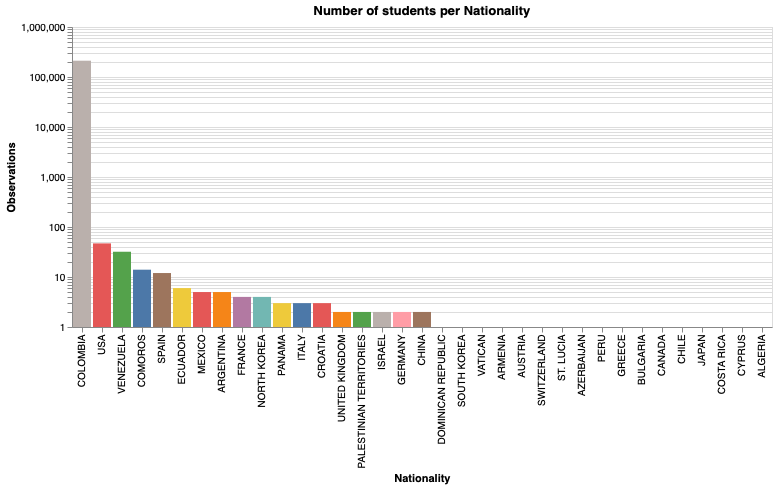

In [176]:
# Nationality
source = df_eng.groupby('your_nationality').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_nationality'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_nationality', sort=source_order, title="Nationality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_nationality', legend=None)
).properties(
    title = "Number of students per Nationality"
)

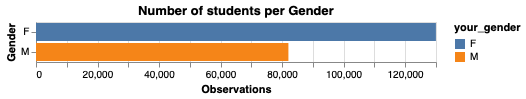

In [177]:
# Gender
source = df_eng.groupby('your_gender').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('your_gender', title="Gender"),
    alt.Color('your_gender')
).properties(
    title = "Number of students per Gender"
)

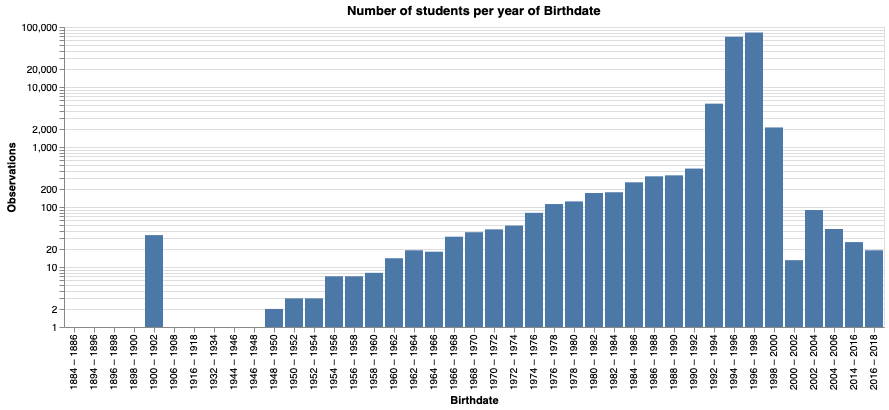

In [178]:
# Birthdate
# pd.DataFrame([pd.to_datetime(df_eng.your_birthdate, errors = 'coerce').dt.to_period('m')]).T
years = [i.year for i in pd.to_datetime(df_eng['your_birthdate'], format='%d/%m/%Y', errors = 'coerce')]
df_hbd = pd.concat([pd.DataFrame(years), df_eng], axis=1, join="inner").rename(columns={0:'your_year_birthdate'})

source = df_hbd.groupby('your_year_birthdate').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('your_year_birthdate:O', title="Birthdate", bin=alt.Bin(maxbins=100)),
    alt.Y('obs', scale=alt.Scale(type='log'), title="Observations")
).properties(
    title = "Number of students per year of Birthdate"
)

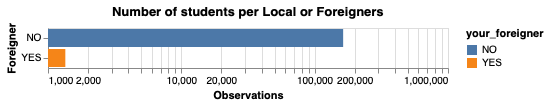

In [179]:
# Foreigners
source = df_eng.groupby('your_foreigner').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_foreigner', title="Foreigner"),
    alt.Color('your_foreigner')
).properties(
    title = "Number of students per Local or Foreigners"
)

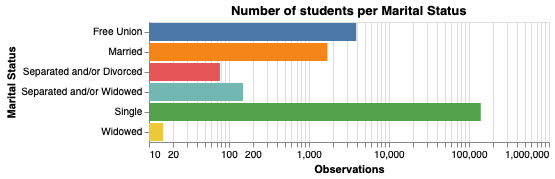

In [180]:
# Marital Status
source = df_eng.groupby('your_marital_status').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_marital_status', title="Marital Status"),
    alt.Color('your_marital_status', legend=None),
    tooltip=['your_marital_status', 'obs']
).properties(
    title = "Number of students per Marital Status"
)

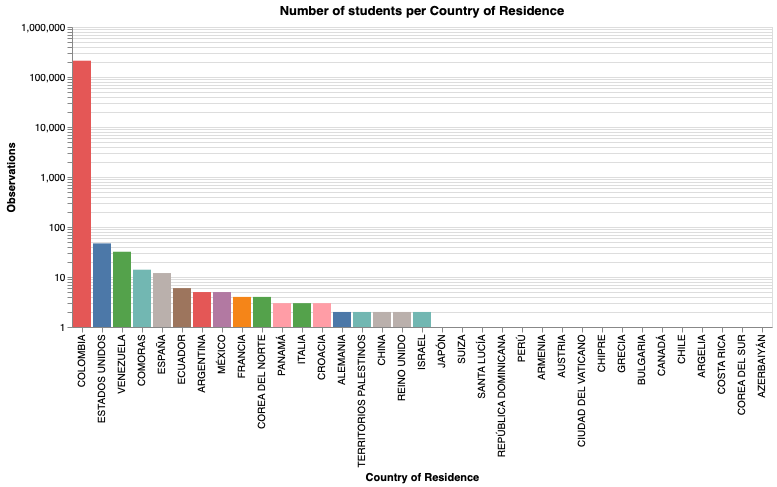

In [181]:
# Country residence
source = df_eng.groupby('your_country_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_country_resides'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_country_resides', sort=source_order, title="Country of Residence"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_country_resides', legend=None)
).properties(
    title = "Number of students per Country of Residence"
)

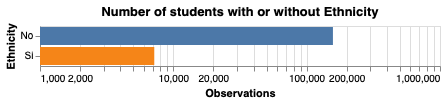

In [182]:
# Ethnicity
source = df_eng.groupby('your_have_ethnicity').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_have_ethnicity', title="Ethnicity"),
    alt.Color('your_have_ethnicity', legend=None),
    tooltip=['your_have_ethnicity', 'obs']
).properties(
    title = "Number of students with or without Ethnicity"
)

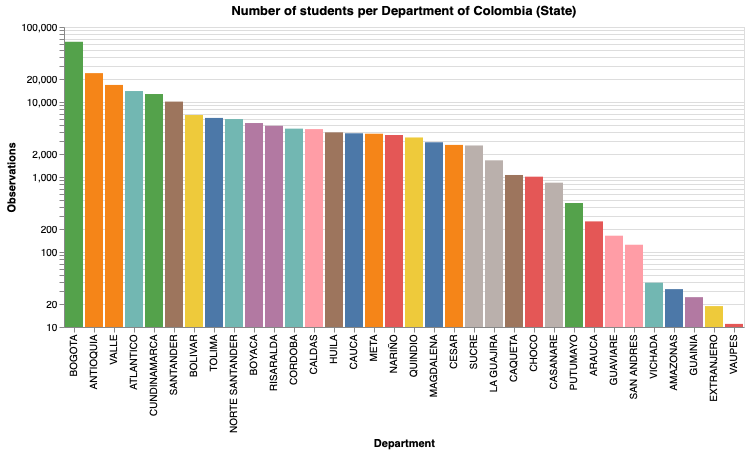

In [183]:
# Department of residence (Colombia states)
source = df_eng.groupby('your_dept_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_dept_resides'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_dept_resides', sort=source_order, title="Department"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_dept_resides', legend=None),
    tooltip=['your_dept_resides', 'obs']
).properties(
    title = "Number of students per Department of Colombia (State)"
)

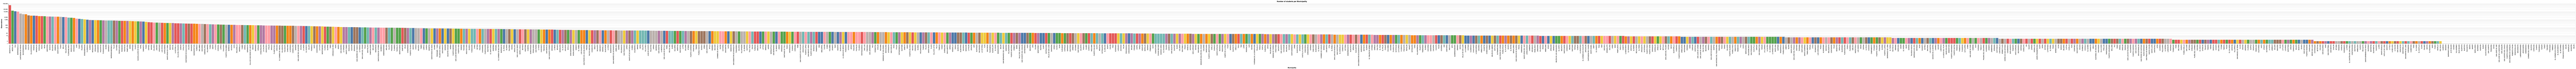

In [184]:
# Municipality
source = df_eng.groupby('your_municipality_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_municipality_resides'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_municipality_resides', sort=source_order, title="Municipality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_municipality_resides', legend=None),
    tooltip=['your_municipality_resides', 'obs']
).properties(
    title = "Number of students per Municipality"
)

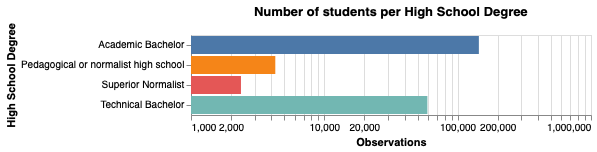

In [185]:
# High School Degree
source = df_eng.groupby('your_high_school_degree').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_high_school_degree', title="High School Degree"),
    alt.Color('your_high_school_degree', legend=None),
    tooltip=['your_high_school_degree', 'obs']
).properties(
    title = "Number of students per High School Degree"
)

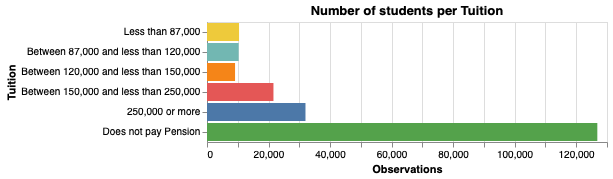

In [186]:
# Tuition
source = df_eng.groupby('your_tuition').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = ['Less than 87,000', 'Between 87,000 and less than 120,000', 'Between 120,000 and less than 150,000',
                'Between 150,000 and less than 250,000', '250,000 or more', 'Does not pay Pension']

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),#, scale=alt.Scale(type='log')),
    alt.Y('your_tuition', sort=source_order, title="Tuition"),
    alt.Color('your_tuition', legend=None),
    tooltip=['your_tuition', 'obs']
).properties(
    title = "Number of students per Tuition"
)


In [187]:
# Repeated variable `your_country_resides`
# (comparison between both variables)
df_eng.groupby(['your_country_resides','your_country_resides.1']).count()[['your_consecutive']].reset_index()

,your_country_resides,your_country_resides.1,your_consecutive
0,ALEMANIA,COLOMBIA,2
1,ARGELIA,COLOMBIA,1
2,ARGENTINA,COLOMBIA,5
3,ARMENIA,COLOMBIA,1
4,AUSTRIA,COLOMBIA,1
5,AZERBAIYÁN,COLOMBIA,1
6,BULGARIA,COLOMBIA,1
7,CANADÁ,COLOMBIA,1
8,CHILE,COLOMBIA,1
9,CHINA,CHINA,1


In [188]:
# Repeated variable `your_gender`
# (comparison between both variables)
df_eng.groupby(['your_gender','your_gender.1']).count()[['your_consecutive']].reset_index()

,your_gender,your_gender.1,your_consecutive
0,F,F,129131
1,F,M,838
2,M,F,753
3,M,M,81275


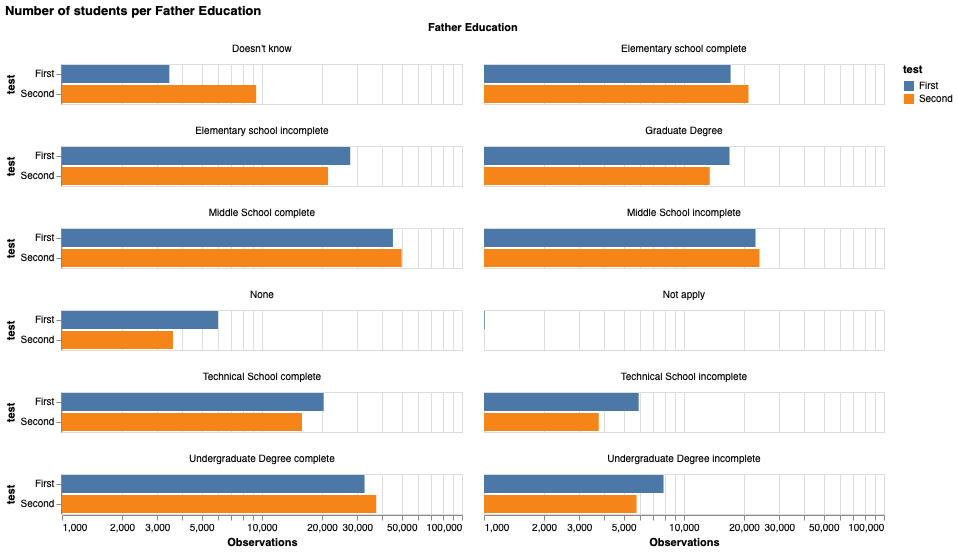

In [189]:
# Father education
# Repeated variable `fami_father_education` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_father_education']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_father_education.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_father_education.1':'fami_father_education'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_father_education', columns=2, title="Father Education"),
    tooltip=['fami_father_education', 'obs', 'test']
).properties(
    title = "Number of students per Father Education"
)

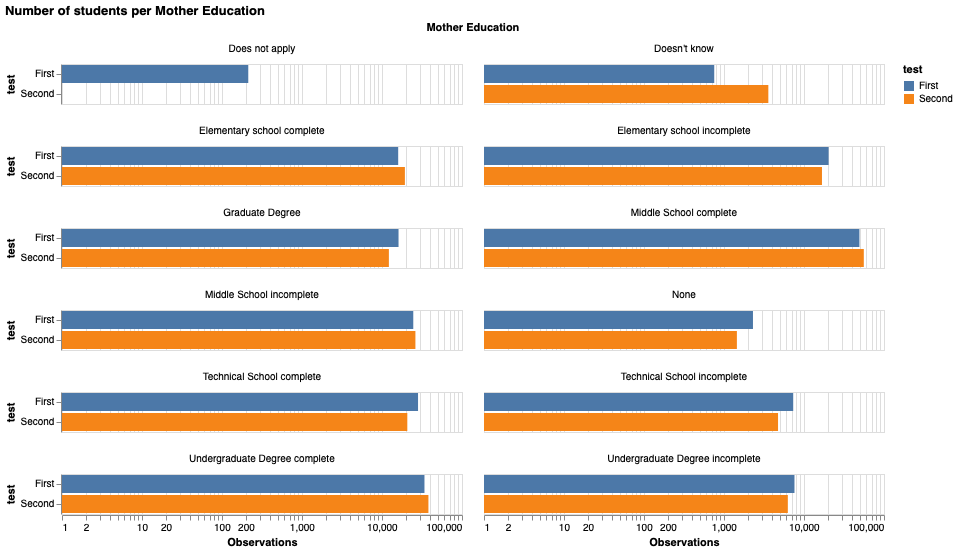

In [190]:
# Mother education
# Repeated variable `fami_mother_education` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_mother_education']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_mother_education.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_mother_education.1':'fami_mother_education'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_mother_education', columns=2, title="Mother Education"),
    tooltip=['fami_mother_education', 'obs', 'test']
).properties(
    title = "Number of students per Mother Education"
)

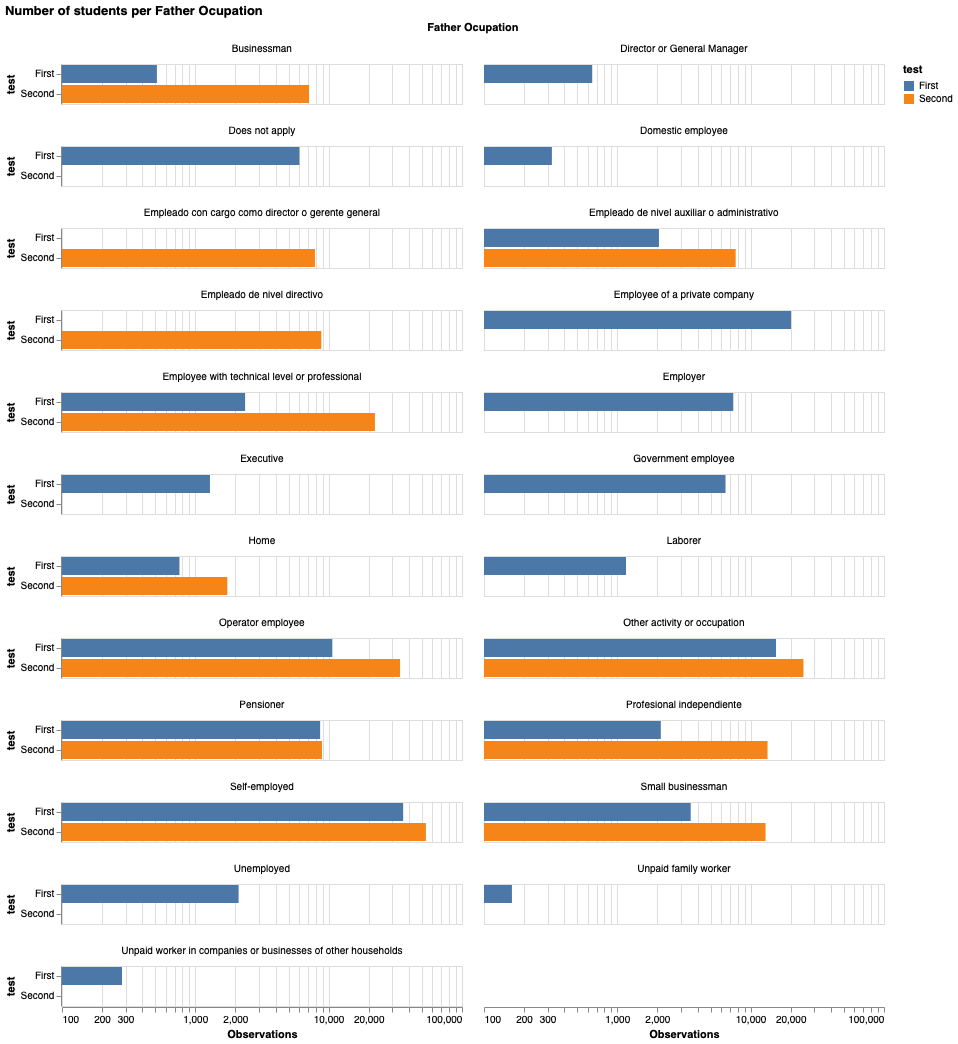

In [191]:
# Father occupation
# Repeated variable `fami_father_occupation` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_father_occupation']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_father_occupation.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_father_occupation.1':'fami_father_occupation'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_father_occupation', columns=2, title="Father Ocupation"),
    tooltip=['fami_father_occupation', 'obs', 'test']
).properties(
    title = "Number of students per Father Ocupation"
)

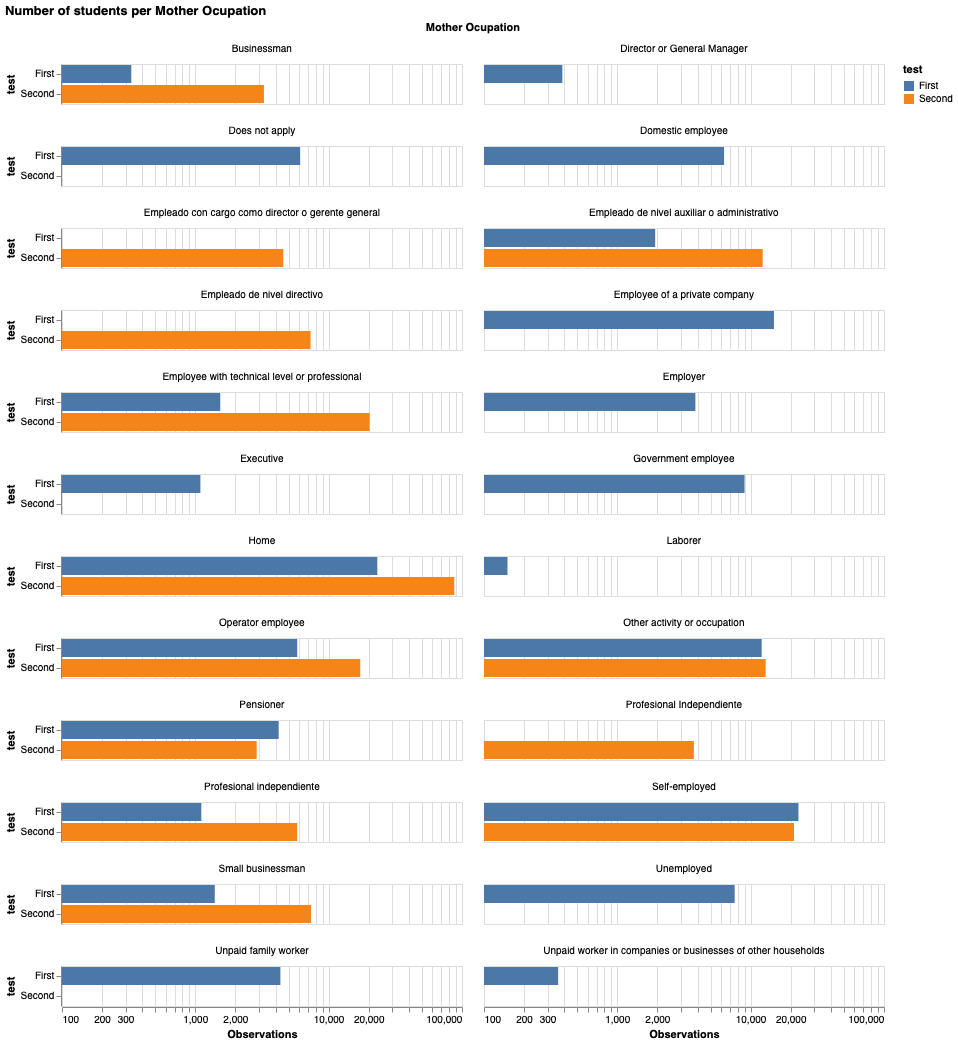

In [192]:
# Mother occupation
# Repeated variable `fami_mother_occupation` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_mother_occupation']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_mother_occupation.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_mother_occupation.1':'fami_mother_occupation'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_mother_occupation', columns=2, title="Mother Ocupation"),
    tooltip=['fami_mother_occupation', 'obs', 'test']
).properties(
    title = "Number of students per Mother Ocupation"
)

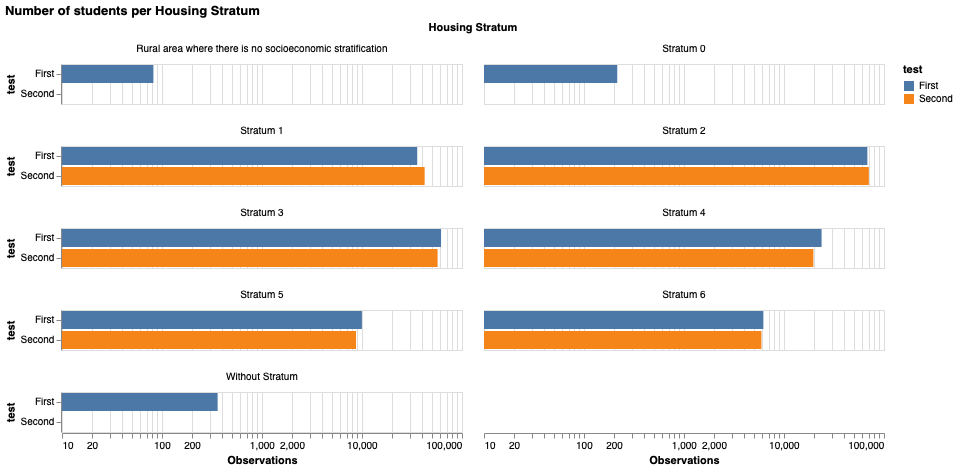

In [193]:
# Housing stratum
# Repeated variable `fami_housing_stratum` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_housing_stratum']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_housing_stratum.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_housing_stratum.1':'fami_housing_stratum'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_housing_stratum', columns=2, title="Housing Stratum"),
    tooltip=['fami_housing_stratum', 'obs', 'test']
).properties(
    title = "Number of students per Housing Stratum"
)

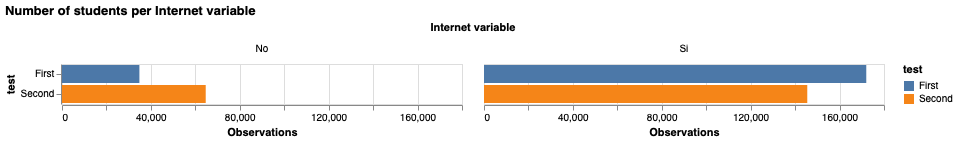

In [194]:
# Internet
# Repeated variable `fami_internet` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_internet']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_internet.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_internet.1':'fami_internet'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_internet', columns=2, title="Internet variable"),
    tooltip=['fami_internet', 'obs', 'test']
).properties(
    title = "Number of students per Internet variable"
)

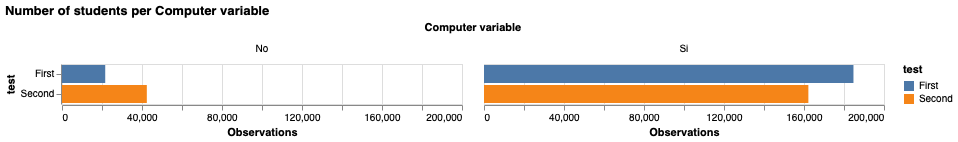

In [195]:
# Computer
# Repeated variable `fami_computer` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_computer']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_computer.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_computer.1':'fami_computer'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_computer', columns=2, title="Computer variable"),
    tooltip=['fami_computer', 'obs', 'test']
).properties(
    title = "Number of students per Computer variable"
)

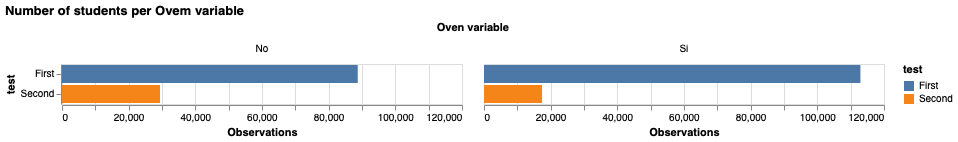

In [196]:
# Oven
# Repeated variable `fami_oven` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_oven']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_have_oven']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_have_oven':'fami_oven'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_oven', columns=2, title="Oven variable"),
    tooltip=['fami_oven', 'obs', 'test']
).properties(
    title = "Number of students per Ovem variable"
)

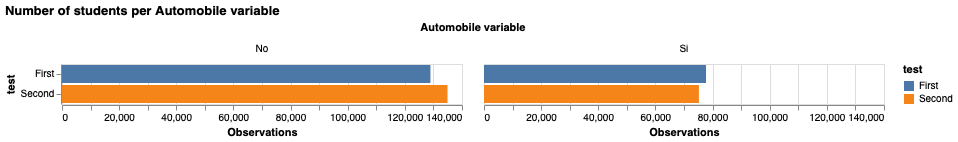

In [197]:
# Automobile
# Repeated variable `fami_automobile` (comparison between both variables)
aux_1 = df_eng.groupby(['fami_automobile']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = df_eng.groupby(['fami_automobile.1']).count()[['your_consecutive']].reset_index()
aux_2.rename(columns={'fami_automobile.1':'fami_automobile'}, inplace=True)
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('test', sort=source_order),
    alt.Color('test'),
    alt.Facet('fami_automobile', columns=2, title="Automobile variable"),
    tooltip=['fami_automobile', 'obs', 'test']
).properties(
    title = "Number of students per Automobile variable"
)

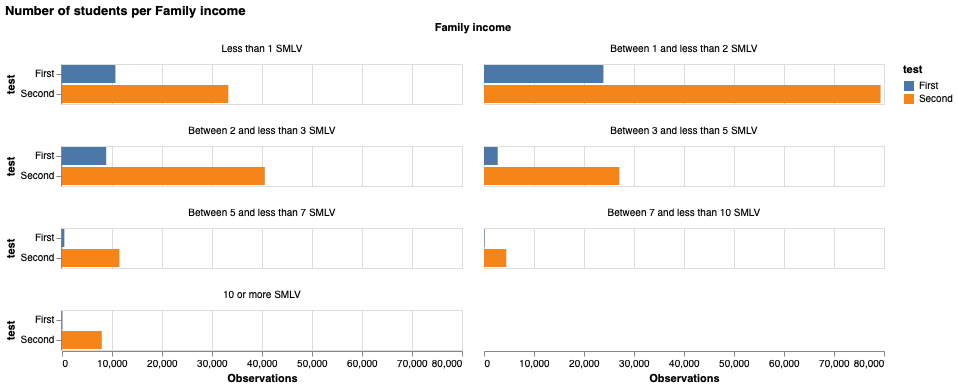

In [198]:
# Family income
# Repeated variable `fami_monthly_family_income` (comparison between both variables)
aux_0 = df_eng[['fami_monthly_family_income', 'your_consecutive']]
aux_1 = aux_0.iloc[:,[True,False,True]].groupby(['fami_monthly_family_income']).count()[['your_consecutive']].reset_index()
aux_1['test'] = 'First'
aux_2 = aux_0.iloc[:,[False,True,True]].groupby(['fami_monthly_family_income']).count()[['your_consecutive']].reset_index()
aux_2['test'] = 'Second'

source = pd.concat([aux_1, aux_2]).rename(columns={'your_consecutive':'obs'})
source_order = ['Less than 1 SMLV', 'Between 1 and less than 2 SMLV', 'Between 2 and less than 3 SMLV', 
                'Between 3 and less than 5 SMLV', 'Between 5 and less than 7 SMLV', 
                'Between 7 and less than 10 SMLV', '10 or more SMLV']

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('test'),
    alt.Color('test'),
    alt.Facet('fami_monthly_family_income', sort=source_order, 
              columns=2, title="Family income"),
    tooltip=['fami_monthly_family_income', 'obs', 'test']
).properties(
    title = "Number of students per Family income"
)


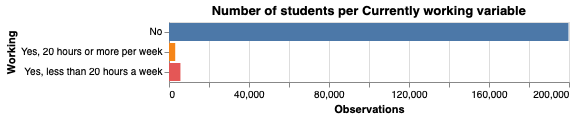

In [199]:
# Currently working
# Repeated variable `your_currently_working` (comparison between both variables)
source = df_eng.groupby(['your_currently_working']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})
source
#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('your_currently_working', title="Working"),
    alt.Color('your_currently_working', legend=None),
).properties(
    title = "Number of students per Currently working variable"
)

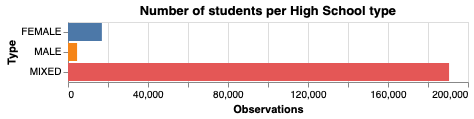

In [200]:
# Type of High School
# Repeated variable `cole_type` (comparison between both variables)
source = df_eng.groupby(['cole_type']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('cole_type', title="Type"),
    alt.Color('cole_type', legend=None),
).properties(
    title = "Number of students per High School type"
)

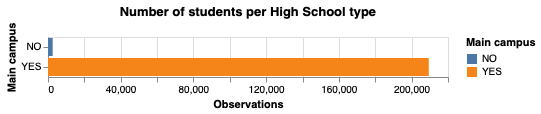

In [201]:
# Type of High School
# Repeated variable `cole_type` (comparison between both variables)
source = df_eng.groupby(['cole_main_campus']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('cole_main_campus', title="Main campus"),
    alt.Color('cole_main_campus', title="Main campus"),
).properties(
    title = "Number of students per High School type"
)

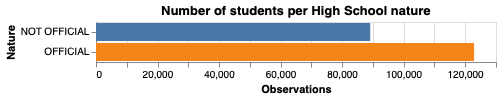

In [202]:
# Type of High School nature
# Repeated variable `cole_nature` (comparison between both variables)
source = df_eng.groupby(['cole_nature']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),# scale=alt.Scale(type='log')),
    alt.Y('cole_nature', title="Nature"),
    alt.Color('cole_nature', legend=None),
).properties(
    title = "Number of students per High School nature"
)

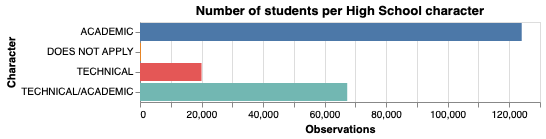

In [203]:
# Type of High School character
# Repeated variable `cole_nature` (comparison between both variables)
source = df_eng.groupby(['cole_character']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('cole_character', title="Character"),
    alt.Color('cole_character', legend=None),
).properties(
    title = "Number of students per High School character"
)

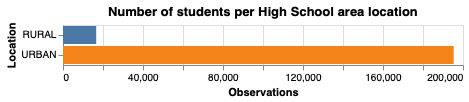

In [204]:
# Type of High School area location
# Repeated variable `cole_nature` (comparison between both variables)
source = df_eng.groupby(['cole_area_location']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('cole_area_location', title="Location"),
    alt.Color('cole_area_location', legend=None),
).properties(
    title = "Number of students per High School area location"
)

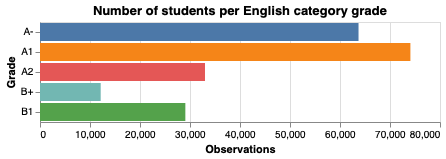

In [205]:
# English category grade
# Repeated variable `cole_nature` (comparison between both variables)
source = df_eng.groupby(['score_english_saber_11_category']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('score_english_saber_11_category', title="Grade"),
    alt.Color('score_english_saber_11_category', legend=None),
).properties(
    title = "Number of students per English category grade"
)

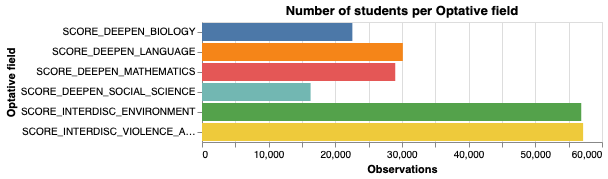

In [206]:
# Optative field
# Repeated variable `cole_nature` (comparison between both variables)
source = df_eng.groupby(['optative_field_saber_11']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

#plot
alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('optative_field_saber_11', title="Optative field"),
    alt.Color('optative_field_saber_11', legend=None),
).properties(
    title = "Number of students per Optative field"
)

### Numerical variables
⚠️ On construction!

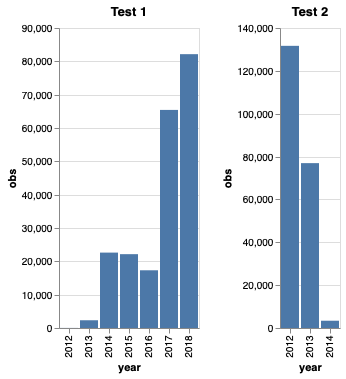

In [207]:
# 'period' by year

#test 1
df_aux = pd.DataFrame(data = [df_eng['period'].map(str).str[:4],
             df_eng['period'].map(str).str[4:]], index=['year', 'quarter']).T

source = df_aux.groupby(['year']).count()[['quarter']].reset_index().rename(columns={'quarter':'obs'})

test_1 = alt.Chart(source).mark_bar().encode(
    alt.X("year"),
    alt.Y("obs")
).properties(title="Test 1")

# test 2
df_aux = pd.DataFrame(data = [df_eng['period.1'].map(str).str[:4],
             df_eng['period.1'].map(str).str[4:]], index=['year', 'quarter']).T

source = df_aux.groupby(['year']).count()[['quarter']].reset_index().rename(columns={'quarter':'obs'})

test_2 = alt.Chart(source).mark_bar().encode(
    alt.X("year"),
    alt.Y("obs")
).properties(title="Test 2")

test_1 | test_2

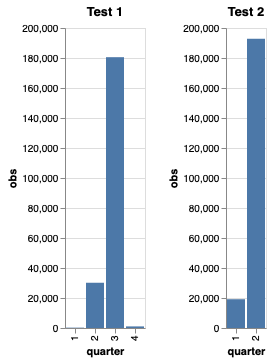

In [208]:
# 'period' by quarter

#test 1
df_aux = pd.DataFrame(data = [df_eng['period'].map(str).str[:4],
             df_eng['period'].map(str).str[4:]], index=['year', 'quarter']).T

source = df_aux.groupby(['quarter']).count()[['year']].reset_index().rename(columns={'year':'obs'})

test_1 = alt.Chart(source).mark_bar().encode(
    alt.X("quarter"),
    alt.Y("obs")
).properties(title="Test 1")

# test 2
df_aux = pd.DataFrame(data = [df_eng['period.1'].map(str).str[:4],
             df_eng['period.1'].map(str).str[4:]], index=['year', 'quarter']).T

source = df_aux.groupby(['quarter']).count()[['year']].reset_index().rename(columns={'year':'obs'})

test_2 = alt.Chart(source).mark_bar().encode(
    alt.X("quarter"),
    alt.Y("obs")
).properties(title="Test 2")

test_1 | test_2

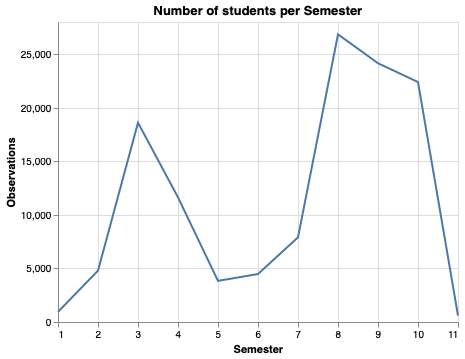

In [209]:
# Semester
source = df_eng.groupby(['your_on_semester']).count()[['your_consecutive']].reset_index()
alt.Chart(source).mark_line().encode(
    alt.X('your_on_semester', title="Semester"),
    alt.Y('your_consecutive', title="Observations")
).properties(title="Number of students per Semester")

In [210]:
# Municipality when students took the saber 11 and pro tests
print("Number of students that resides in THE SAME muncipality when took test `saber 11` and `saber pro`:")
print(len(df_eng.loc[(df_eng['your_municipality_resides'] == df_eng['your_municipality_resides.1'])][['your_municipality_resides','your_municipality_resides.1']]))

print("\nNumber of students that resides in DIFFERENT muncipality when took test `saber 11` and `saber pro`:")
print(len(df_eng.loc[~(df_eng['your_municipality_resides'] == df_eng['your_municipality_resides.1'])][['your_municipality_resides','your_municipality_resides.1']]))

Number of students that resides in THE SAME muncipality when took test `saber 11` and `saber pro`:
159032

Number of students that resides in DIFFERENT muncipality when took test `saber 11` and `saber pro`:
52978


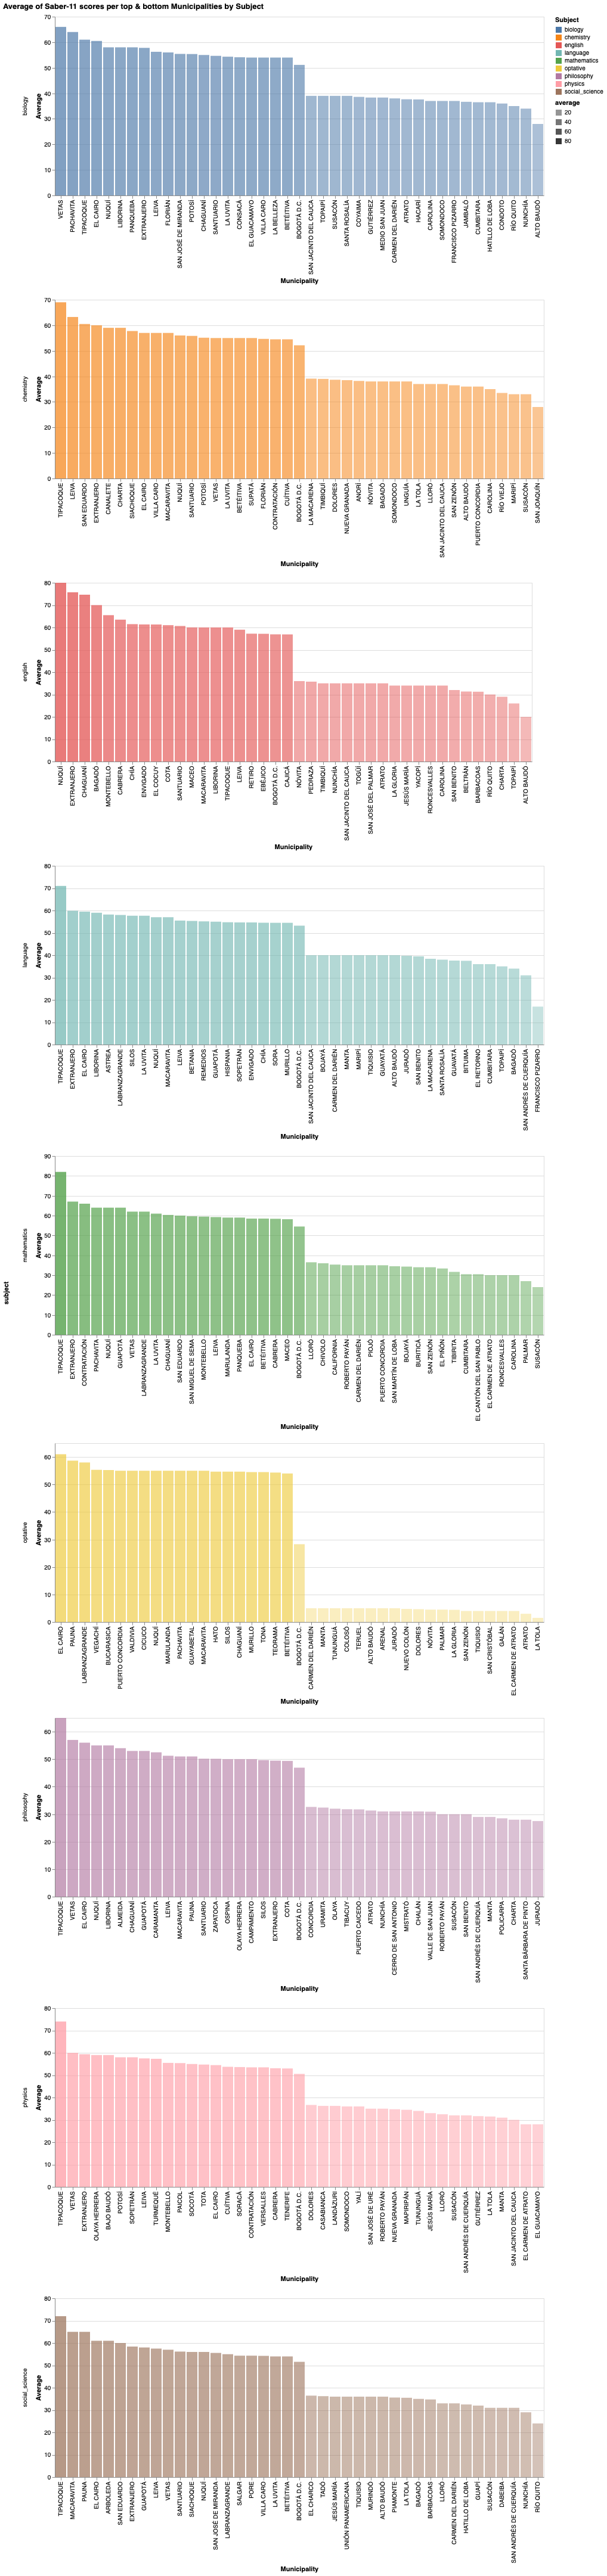

In [211]:
# Average of Saber-11 scores per top & bottom Municipalities by Subject
source = pd.DataFrame(columns=['your_municipality_resides', 'average', 'subject'])
saber_11_scores = ['score_language_saber_11', 'score_mathematics_saber_11', 'score_biology_saber_11', 'score_chemistry_saber_11', 'score_physics_saber_11', 'score_social_science_saber_11', 'score_philosophy_saber_11', 'score_english_saber_11', 'score_optative_saber_11']

for i in saber_11_scores:
    aux = df_eng.groupby(['your_municipality_resides']).mean()[[i]].reset_index().rename(columns={i:'average'})
    aux.sort_values(by=['average'], ascending=False, inplace=True)
    # if clause to find if inb top or bottim is Bogota, the capital of Colombia
    if ('BOGOTÁ D.C.' in list(aux.head(20).your_municipality_resides)):
        aux = pd.concat([aux.head(20), aux.tail(20)])
    else:
        aux = pd.concat([aux.head(20), aux[aux.your_municipality_resides == 'BOGOTÁ D.C.'], aux.tail(20)])
    aux['subject'] = re.sub(r'_saber_11', '', re.sub(r'score_', '', i)) # Cleans the subject text
    source = pd.concat([source, aux])
    
source.reset_index(drop=True, inplace=True)

# plot
# alt.data_transformers.disable_max_rows()  # Disabling MaxRowsError
alt.Chart(source).mark_bar().encode(
    alt.X("your_municipality_resides", sort='-y', title="Municipality"),
    alt.Y("average", title="Average"),
    alt.Color("subject", title="Subject"),
    alt.Row("subject"),
    alt.Opacity("average"),
    tooltip=['subject', 'your_municipality_resides', 'average']
).properties(title="Average of Saber-11 scores per top & bottom Municipalities by Subject"
).resolve_scale(x='independent', y='independent')

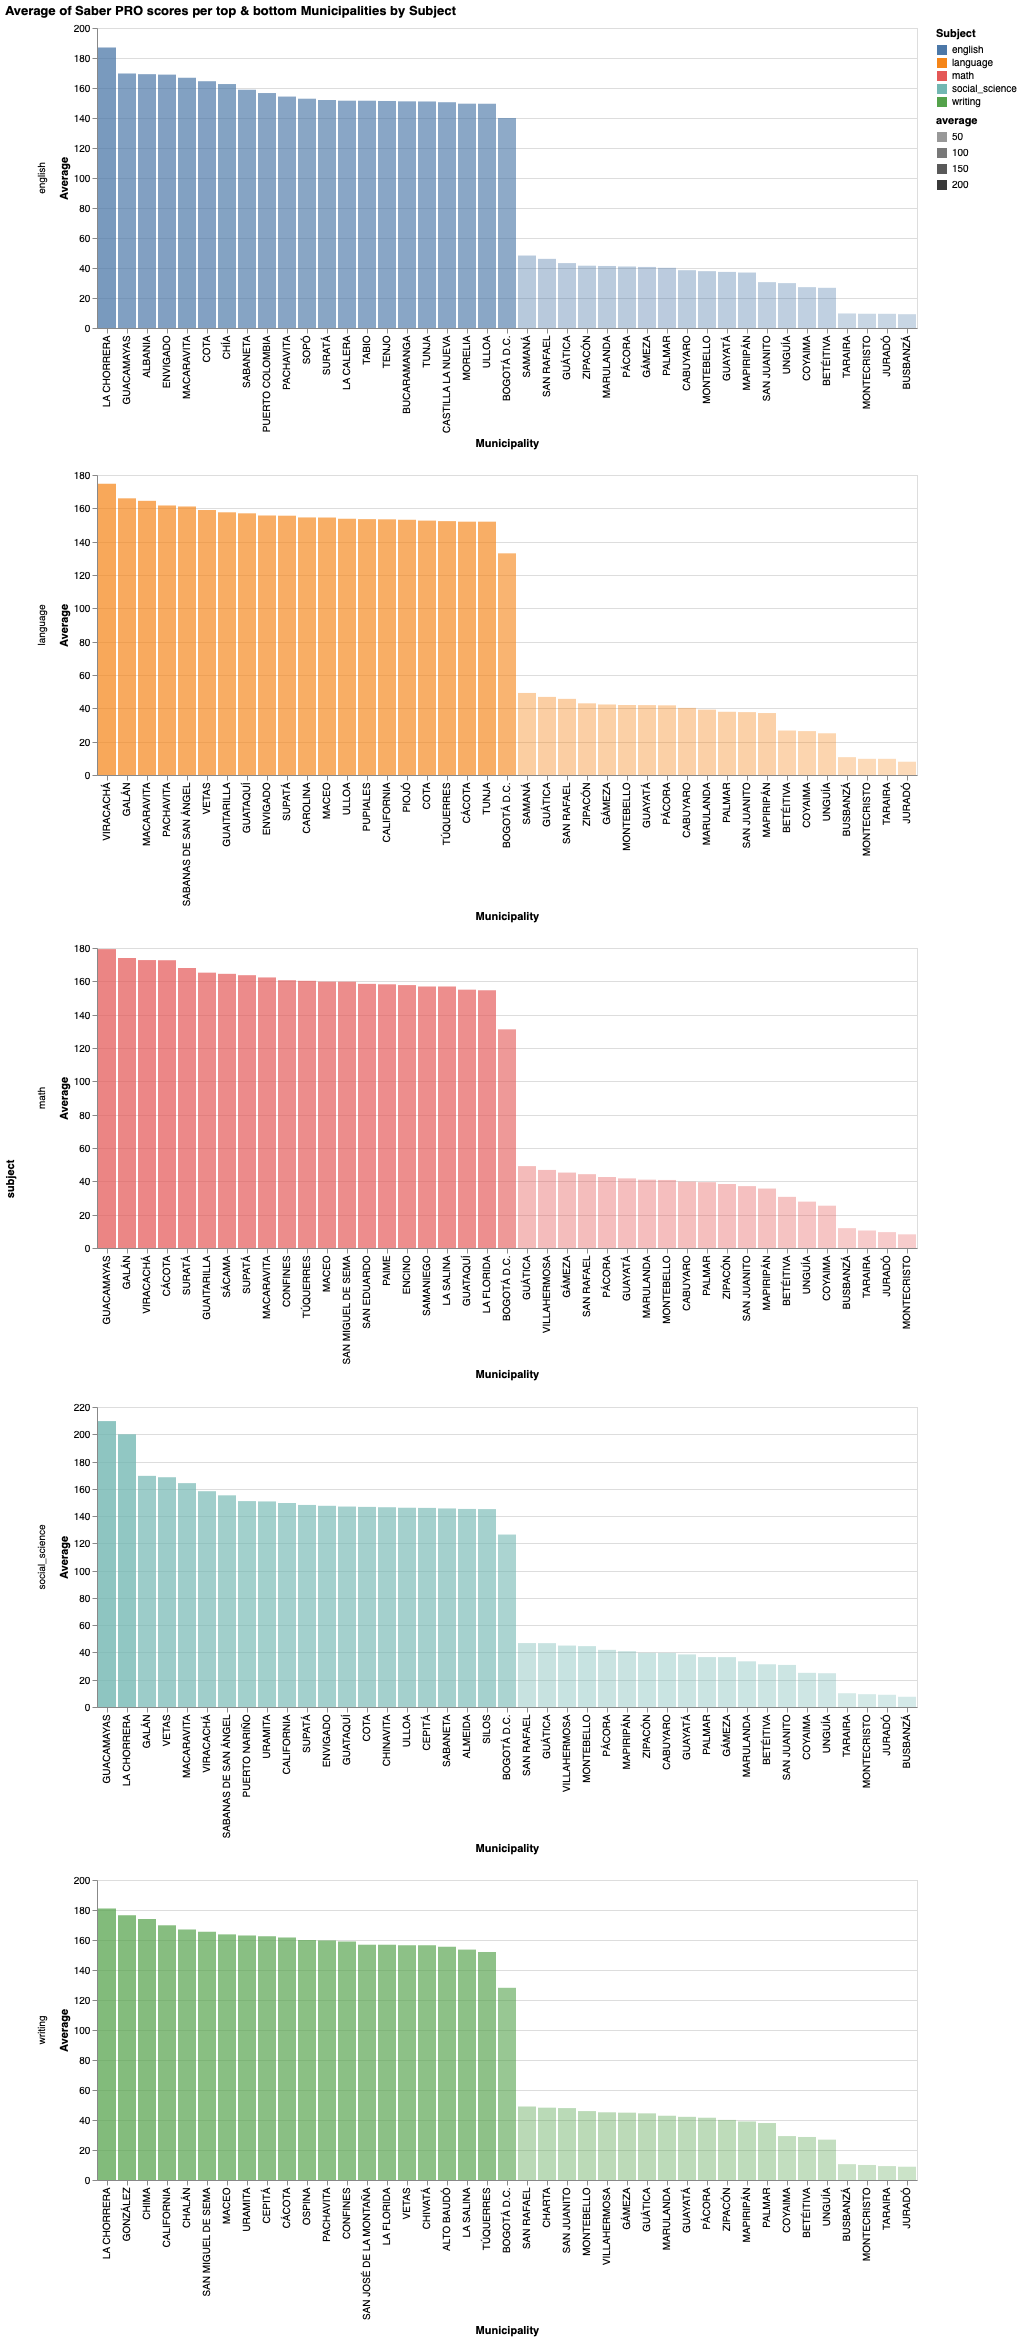

In [212]:
# Average of Saber-PRO scores per top & bottom Municipalities by Subject
source = pd.DataFrame(columns=['your_municipality_resides.1', 'average', 'subject'])
saber_pro_scores = ['score_math_saber_pro', 'score_language_saber_pro', 'score_social_science_saber_pro', 'score_english_saber_pro', 'score_writing_saber_pro']

for i in saber_pro_scores:
    aux = df_eng.groupby(['your_municipality_resides.1']).mean()[[i]].reset_index().rename(columns={i:'average'})
    aux.sort_values(by=['average'], ascending=False, inplace=True)
    # if clause to find if inb top or bottim is Bogota, the capital of Colombia
    if ('BOGOTÁ D.C.' in list(aux.head(20)['your_municipality_resides.1'])):
        aux = pd.concat([aux.head(20), aux.tail(20)])
    else:
        aux = pd.concat([aux.head(20), aux[aux['your_municipality_resides.1'] == 'BOGOTÁ D.C.'], aux.tail(20)])
    aux['subject'] = re.sub(r'_saber_pro', '', re.sub(r'score_', '', i)) # Cleans the subject text
    source = pd.concat([source, aux])
    
source.reset_index(drop=True, inplace=True)
source = source.rename(columns={'your_municipality_resides.1': 'municipality'})

# plot
alt.data_transformers.disable_max_rows()  # Disabling MaxRowsError
alt.Chart(source).mark_bar().encode(
    alt.X("municipality", sort='-y', title="Municipality"),
    alt.Y("average", title="Average"),
    alt.Color("subject", title="Subject"),
    alt.Row("subject"),
    alt.Opacity("average"),
    tooltip=['subject', 'municipality', 'average']
).properties(title="Average of Saber PRO scores per top & bottom Municipalities by Subject"
).resolve_scale(x='independent', y='independent')

In [247]:
from sklearn import preprocessing

x = df_eng[saber_11_scores + saber_pro_scores] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.values)
df_scores = pd.DataFrame(x_scaled, columns=x.columns)
df_scores

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_optative_saber_11,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro
0,0.293578,0.338583,0.396040,0.442105,0.266129,0.297297,0.281553,0.386139,0.544444,0.032000,0.027667,0.027333,0.031333,0.009543
1,0.440367,0.503937,0.524752,0.547368,0.435484,0.396396,0.456311,0.514851,0.066667,0.036000,0.033667,0.038000,0.032000,0.012952
2,0.522936,0.330709,0.504950,0.536842,0.225806,0.414414,0.436893,0.435644,0.055556,0.035333,0.037333,0.034667,0.031667,0.011247
3,0.366972,0.362205,0.346535,0.368421,0.362903,0.378378,0.388350,0.435644,0.322222,0.031000,0.027333,0.030667,0.031667,0.009543
4,0.440367,0.346457,0.574257,0.684211,0.354839,0.441441,0.417476,0.425743,0.611111,0.483333,0.596667,0.393333,0.440000,0.447853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212005,0.440367,0.425197,0.495050,0.568421,0.564516,0.477477,0.504854,0.584158,0.066667,0.566667,0.456667,0.506667,0.550000,0.400136
212006,0.678899,0.669291,0.683168,0.589474,0.443548,0.540541,0.407767,0.752475,0.055556,0.556667,0.350000,0.280000,0.623333,0.638718
212007,0.477064,0.275591,0.435644,0.305263,0.370968,0.360360,0.330097,0.386139,0.577778,0.320000,0.386667,0.433333,0.330000,0.458078
212008,0.440367,0.393701,0.425743,0.484211,0.362903,0.396396,0.320388,0.435644,0.577778,0.493333,0.370000,0.413333,0.516667,0.570552


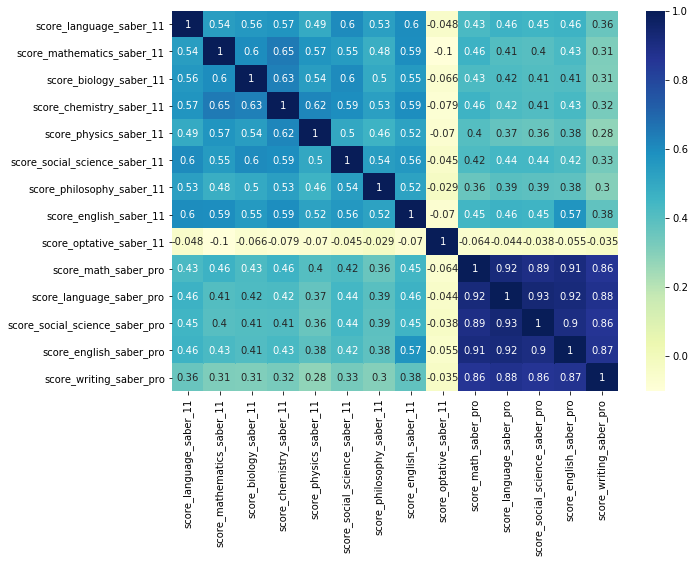

In [249]:
# correlation of saber 11 and saber pro scores
marks_corr = df_scores.corr()
# sns.heatmap(marks_corr)
# plt.show()
plt.figure(figsize=(10,7))
sns.heatmap(marks_corr, annot=True, cmap="YlGnBu");

In [213]:
print(num_col)

['period', 'your_dept_code_resides', 'your_municipality_code_resides', 'your_year_exam_sb11', 'your_on_semester', 'inst_institution_code', 'your_prgm_academic_snies', 'your_prgm_municipality_code', 'your_inst_municipality_code', 'score_math_saber_pro', 'score_language_saber_pro', 'score_social_science_saber_pro', 'score_english_saber_pro', 'score_writing_saber_pro', 'your_inst_department_code', 'period.1', 'your_dept_code_resides.1', 'your_municipality_code_resides.1', 'cole_saber_11_icfes_code', 'cole_saber_11_icfes_dane', 'cole_dane_code_campus', 'cole_municipality_code_location', 'cole_dept_code_location', 'score_language_saber_11', 'score_mathematics_saber_11', 'score_biology_saber_11', 'score_chemistry_saber_11', 'score_physics_saber_11', 'score_social_science_saber_11', 'score_philosophy_saber_11', 'score_english_saber_11', 'score_optative_saber_11']
